<a href="https://colab.research.google.com/github/NaveedShariff/Pain-Detection-Using-AU/blob/main/Pain_detection_using_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Action Units calculation and Pain Detection YOLO

---




100%|██████████| 1/1 [00:09<00:00,  9.04s/it]


     FaceRectX   FaceRectY  FaceRectWidth  FaceRectHeight  FaceScore
0  1077.843994  237.788567     542.432536       671.46595    0.99987
       AU01      AU02      AU04      AU05      AU06  AU07     AU09      AU10  \
0  0.256352  0.123548  0.561081  0.280122  0.571487   1.0  0.45302  0.862471   

   AU11      AU12      AU14      AU15      AU17  AU20      AU23      AU24  \
0   1.0  0.847332  0.623246  0.407088  0.399933   0.0  0.460796  0.273567   

       AU25      AU26      AU28      AU43  
0  0.994444  0.313337  0.044908  0.022496  
      anger   disgust      fear  happiness   sadness  surprise   neutral
0  0.001146  0.526595  0.339975    0.00075  0.130702  0.000293  0.000539
      Pitch      Roll       Yaw
0  1.745798 -0.942748 -1.655441


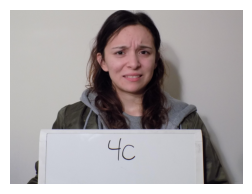

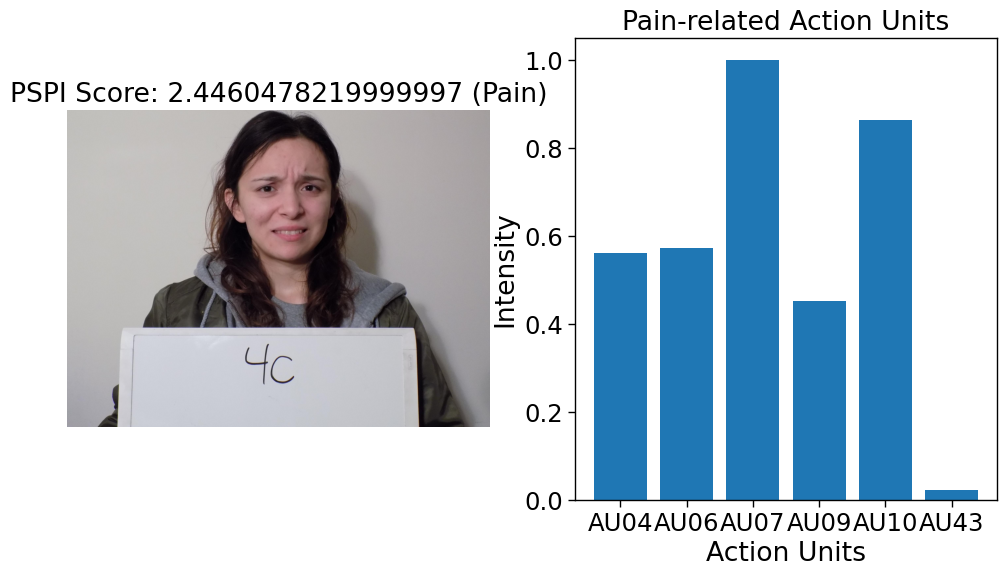

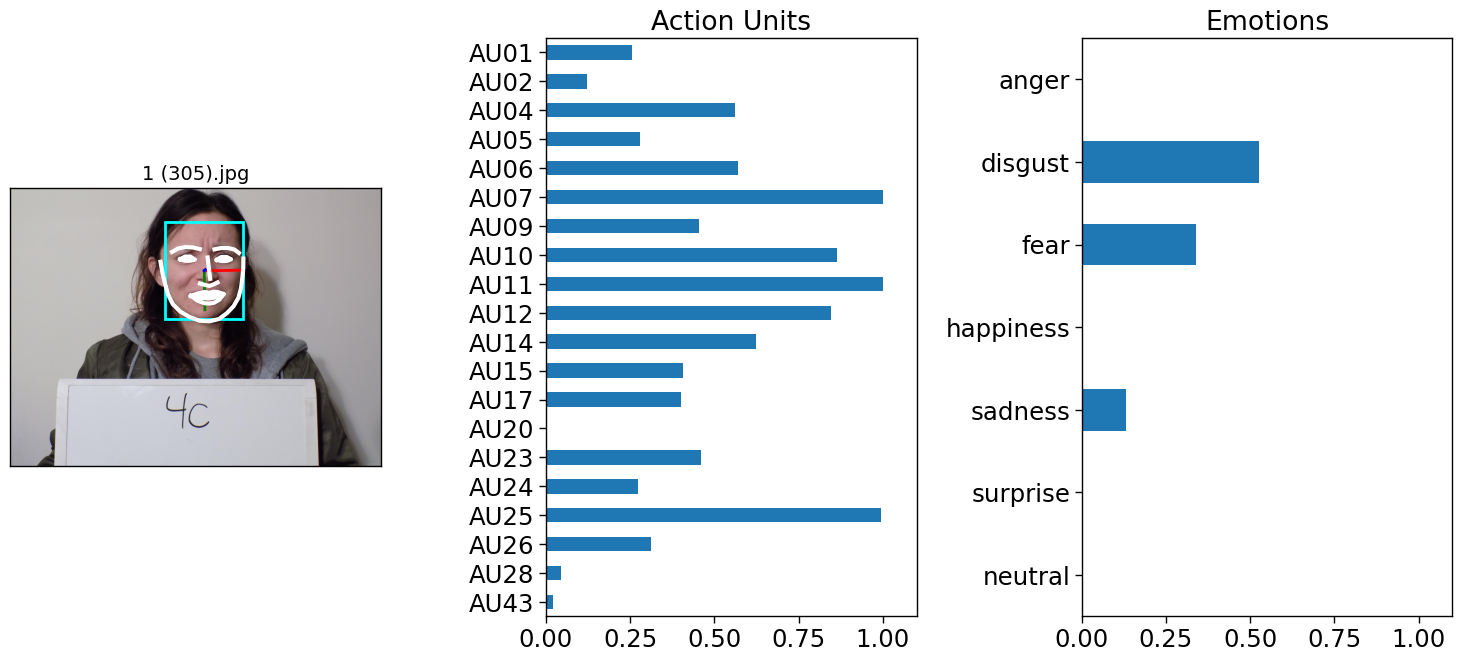

Calculated PSPI Score: 2.4460478219999997


In [3]:
!pip install py-feat seaborn


from feat import Detector
from feat.utils.io import get_test_data_path, read_feat
from feat.plotting import imshow
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import os


detector = Detector(
    face_model="retinaface",
    landmark_model="mobilefacenet",
    au_model='xgb',
    emotion_model="resmasknet",
    facepose_model="img2pose",
)


image_path = '/content/1 (305).jpg'
imshow(image_path)
single_face_prediction = detector.detect_image(image_path)


print(single_face_prediction.faceboxes)
print(single_face_prediction.aus)
print(single_face_prediction.emotions)
print(single_face_prediction.poses)


csv_output_path = '/content/output.csv'
single_face_prediction.to_csv(csv_output_path, index=False)


df = pd.read_csv(csv_output_path)
row = df.iloc[0]


AU_intensities = {
    'AU04': row['AU04'],
    'AU06': row['AU06'],
    'AU07': row['AU07'],
    'AU09': row['AU09'],
    'AU10': row['AU10'],
    'AU43': row['AU43']
}


AU4 = AU_intensities['AU04']
AU6 = AU_intensities['AU06']
AU7 = AU_intensities['AU07']
AU9 = AU_intensities['AU09']
AU10 = AU_intensities['AU10']
AU43 = AU_intensities['AU43']


PSPI = AU4 + max(AU6, AU7) + max(AU9, AU10) + AU43


fig, ax = plt.subplots(1, 2, figsize=(12, 6))
image_rgb = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
ax[0].imshow(image_rgb)
ax[0].set_title(f'PSPI Score: {PSPI} (Pain)')
ax[0].axis('off')


AUs = list(AU_intensities.keys())
intensities = list(AU_intensities.values())
ax[1].bar(AUs, intensities)
ax[1].set_title('Pain-related Action Units')
ax[1].set_xlabel('Action Units')
ax[1].set_ylabel('Intensity')


figs = single_face_prediction.plot_detections(poses=True)


plt.show()
print(f'Calculated PSPI Score: {PSPI}')
